#### Audio file formats
- WAV (Waveform Audio File Format, CD quality audio)
- FLAC (Free Lossless Audio Codec)
- MP3 (compressed audio file format)

In [1]:
import wave
import matplotlib.pyplot as plt
import numpy as np

#### Parameters of an audio file
- number of channels
- sample width : number of bits for each sample
- framerate/sample_rate fs : 44100 Hz usually for CD quality
- number of frames
- values of a frame

In [2]:
# import audio
mandela = wave.open('1020.wav', 'rb') # read binary

print(mandela.getparams())

t_audio = mandela.readframes(mandela.getnframes())

print(type(t_audio), type(t_audio[0]))


_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=16000, comptype='NONE', compname='not compressed')
<class 'bytes'> <class 'int'>


16000
16000
1.0 seconds
(16000,)


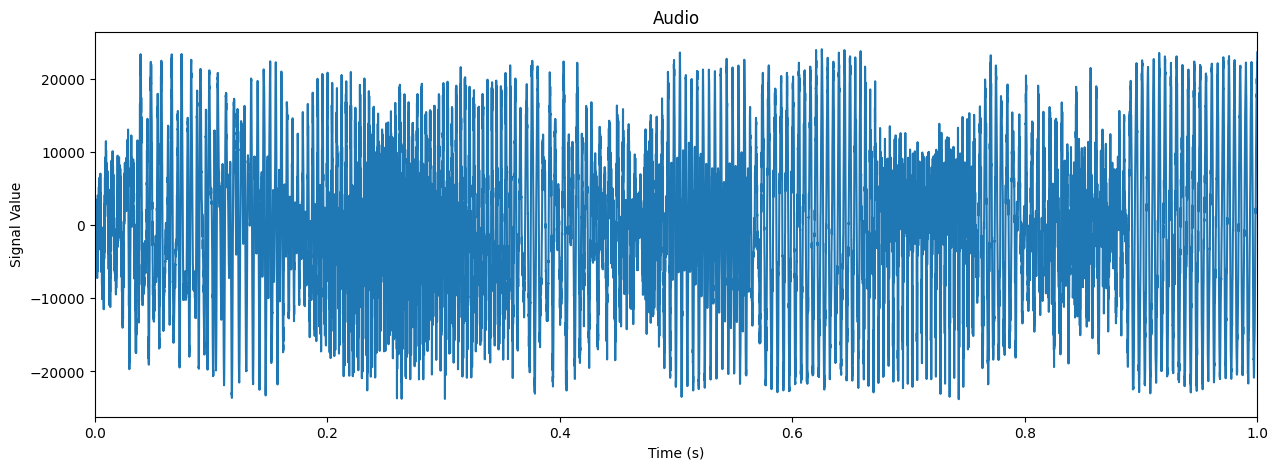

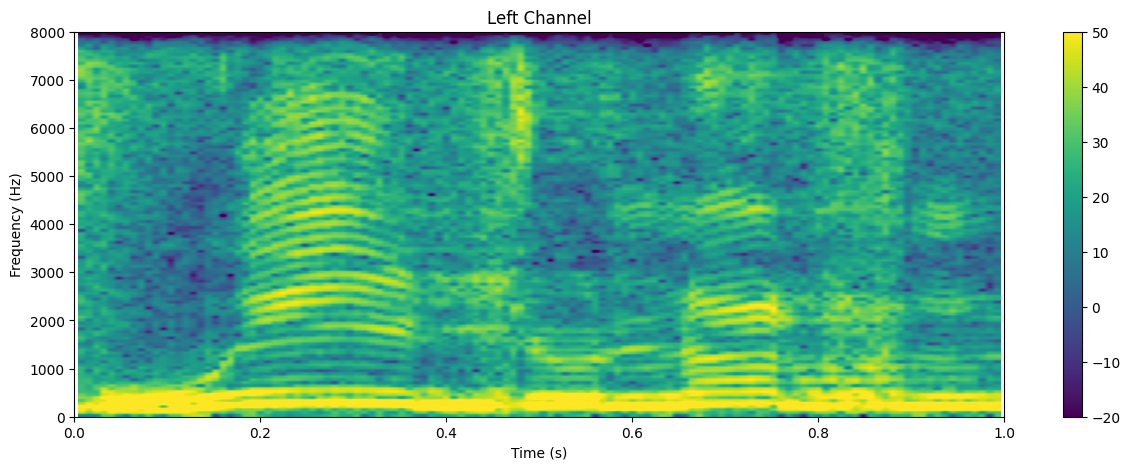

In [3]:
wav_obj = wave.open('1020.wav', 'r')

sample_freq = wav_obj.getframerate()
print(sample_freq)

n_samples = wav_obj.getnframes()
print(n_samples)

t_audio = n_samples/sample_freq
print(t_audio, "seconds")

signal_wave = wav_obj.readframes(n_samples)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
print(signal_array.shape)

# for stereo:
#l_channel = signal_array[0::2]
#r_channel = signal_array[1::2]

times = np.linspace(0, n_samples/sample_freq, num=n_samples)

plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title('Audio')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

plt.figure(figsize=(15, 5))
plt.specgram(signal_array, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()